In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext google.colab.data_table


In [84]:
# 2 dataframes GDP en Gini_index, gemerged op naam van Country
# Gini index geeft per land een getal tussen de 0-1, hoe dichter bij de 1 hoe hoger de income inequality is, hoogste is momenteel 0.54 en de laagste 0.25

gdp = pd.read_csv("https://raw.githubusercontent.com/ngarderen/Income_inequality_Assignment/main/gdp-per-capita-maddison-2020.csv", encoding="latin1") #bestand toevoegen aan github, uitzoeken hoe

gdp = gdp.rename(columns={"Entity" : "Country", "GDP per capita" : "GDP"})
gdp = gdp[(gdp["Year"] == 2018)]
gdp = gdp.loc[:, ["Country", "GDP"]]

gini_index = pd.read_csv("https://raw.githubusercontent.com/ngarderen/Income_inequality_Assignment/main/economic-inequality-gini-index.csv", encoding="latin1") #bestand toevoegen aan github, uitzoeken hoe

gini_index = gini_index.rename(columns={"Entity" : "Country", "Gini coefficient" : "Gini"})
gini_index = gini_index[(gini_index["Year"] == 2018)]
gini_index = gini_index.loc[:, ["Country", "Gini"]]
gini_index['Gini'] = gini_index['Gini'].round(2) #kolom Gini afronden naar 2 decimalen

df_merge = pd.merge(gdp, gini_index, on='Country')
df_merge = df_merge.set_index('Country')
df_merge = df_merge.sort_values(by="GDP", ascending=False)


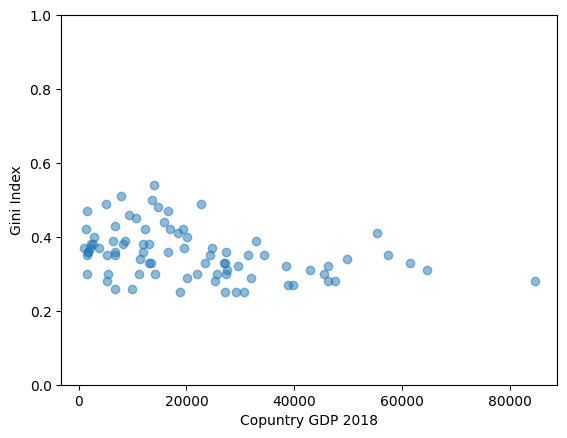

In [85]:
#pearson Correlation Coefficient & scatterplot

pearson = df_merge.corr() # 0.36
plt.scatter(df_merge["GDP"], df_merge["Gini"], alpha=0.5)
plt.xlabel("Copuntry GDP 2018")
plt.ylabel("Gini Index")
plt.ylim(0, 1)
plt.show()

In de GDP data zijn 178 landen van de 195 totaal represent.
Terwijl maar 90 landen aanwezig zijn vanuit de Gini_index, de merge dataframe bestaat vervolgens uit 83 landen.
Dit betekend dat we maar data hebben van iets minder dan de helft van alle landen, vermoedelijk liggen de grote uitschieters ook bij de landen die minder transparant zijn.

Vraag:
Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?


Het blijft lastige vraag om te beantwoorden, zeker omdat er best wel wat bias is en het lastig is om objectief te blijven.
In mijn ogen zijn de grootste factoren voor income inequality, 1) onderwijs 2) discriminatie 3) afkomst met betrekking op vermogen, geld maakt geld.
Wat inpliciet bij mij aangeeft hoe hoger de GDP hoe lager de Gini_index zal zijn.

Objectief gekeken naar de data, de pearson Correlation Coefficient is 0.36 dit houd in dat er wel degelijk een relatie is tussen hoe hoog de GDP is met betrekking tot de Gini_index, echter volgens de tabel (0.20 < 0.40) is dit wel een magere correlatie. 

In een scatterplot zie je dit ook mooi terug, je ziet wat uitschieters in landen met een lagere GDP, en hoe hoger de GDP word hoe kleiner de verschillen zijn.
